# The decode and encode of Caesar cipher

Fu TianShu

2016210898


## The distribution of the words in a text

##    As we know that there are a list of distribution of letters in the text. During classes, professor Xu showed us the distribution of the letters in general  and had used it as a vital tool to decrepit the code 

## However , I was a little doubt about that since every text has a different distribution of  letters and if we use the general form to decrepit it, some inaccuracy might occur due to the difference of the distribution 

## So I deicided to download a long article from website and analysis the encryption and decription by using the distritbution of each letter

### Import the packages we need

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from IPython.display import *
import matplotlib.pyplot as plt

### Load the txt of 《教父》

In [2]:
f=open("《教父》小说英文版.txt",'r')

### Select a specific dialogue from the text and name it as a string 

In [3]:
code_1="Only forty years of professional mourning kept the overwhelming frustration and hatred from showing on Amerigo Bonasera's face. His beautiful young daughter was still in the hospital with her broken jaw wired together; and now these two animales went free? It had all been a farce. He watched the happy parents cluster around their darling sons. Oh, they were all happy now, they were smiling now."

### Count the number of occurrence of each letters in the text and make it as a descend dataframe 

In [4]:
 #dictionary to hold char counts

validchars = "abcdefghijklmnopqrstuvwxyz"
charcount={}
for d in validchars:
    charcount[d]=0
    
for d in validchars:
    charcount[d]=0
validchars = "abcdefghijklmnopqrstuvwxyz" # only these counted
f=open("《教父》小说英文版.txt",'r')
for words in f.read().split():
       for word in words :
        char=list(word)
        for c in char:
            d=c.lower()#Convert all the Capital phrase into lower case
            if d in validchars:
                charcount[d] +=1
    
    

In [5]:
count_num=pd.DataFrame(charcount.items())

In [6]:
count_num_sorted=count_num.sort_values(by=1,ascending=False)

In [7]:
count_num_sorted.head(5)

,0,1
3,e,90880
20,t,65511
13,o,59400
0,a,59203
14,n,51352


### Change the number of occurrence to correspond  occurrence rate

In [8]:
count_num_sorted['rate_of each letter']=count_num_sorted[1]/sum(count_num_sorted[1])
count_num_sorted.head(5)

,0,1,rate_of each letter
3,e,90880,0.123421
20,t,65511,0.088969
13,o,59400,0.080669
0,a,59203,0.080402
14,n,51352,0.069740


### Showing the occurrence  rate of each letters in the book of  《教父》

In [9]:
import matplotlib.pyplot as plt

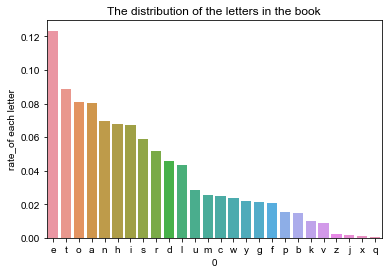

In [10]:
sns.barplot(x=count_num_sorted[0],y=count_num_sorted["rate_of each letter"])
plt.title("The distribution of the letters in the book")
sns.set(rc={'figure.figsize':(20,15)})

### To summarize the step we had down above , we can write a function to count the occurrence number of each letters in a text

In [11]:
def show_letter_dataframe(text):
    validchars = "abcdefghijklmnopqrstuvwxyz"
    for d in validchars:
            charcount[d]=0
    f=open(text,'r')
    for words in f.read().split():
            for word in words :
                char=list(word)
                for c in char:
                        d=c.lower()#Convert all the Capital phrase into lower case
                        if d in validchars:
                             charcount[d] +=1
    count_num=pd.DataFrame(charcount.items())                            
    count_num_sorted=count_num.sort_values(by=1,ascending=False) 
    return count_num_sorted    

In [12]:
show_letter_dataframe("《教父》小说英文版.txt").head(5)

,0,1
3,e,90880
20,t,65511
13,o,59400
0,a,59203
14,n,51352


### Inorder to compare the results from the official webisite, I had searched wikiWikipedia and found the plot of the distribution of each letters in genreal 

## The distribution of each letters in general 


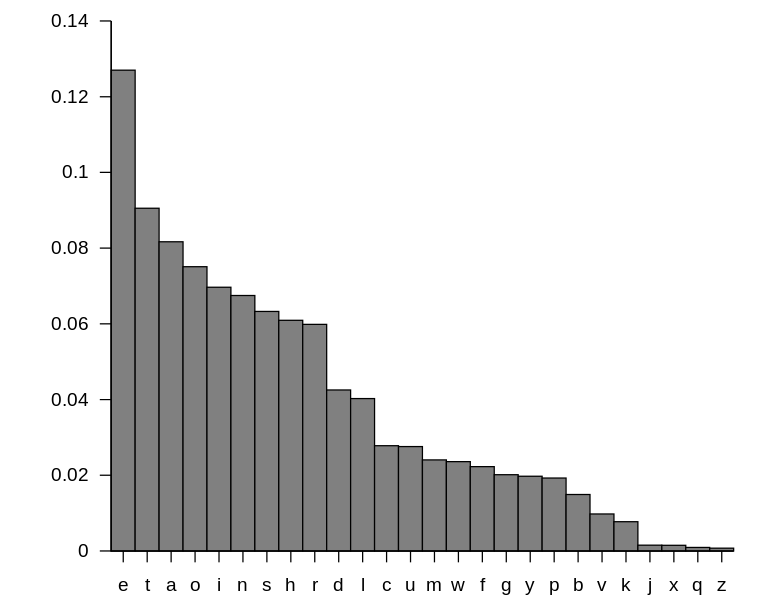

In [13]:
from IPython.display import Image
Image(filename='760px-English_letter_frequency_(frequency).png')

https://en.wikipedia.org/wiki/Letter_frequency
    

### After comparing the result of two distributions of letters , we found that the occurrence rate are mainly the same, however , there still shows a little difference 

# Caesar cipher


## The introduction 

Caesar cipher is also called shift cipher as the type of substitution cipher in which each letter in the plaintext is replaced by a letter some fixed number of positions down the alphabet

Here is a picture showing the basic logic of Caesar cipher

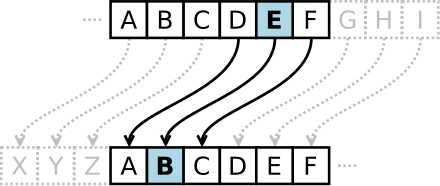

In [14]:
from IPython.display import Image
Image(filename='440px-Caesar_cipher_left_shift_of_3.png',width=700,height=500)

https://en.wikipedia.org/wiki/Caesar_cipher

## The encode of Caesar cipher 

The way of encryption in Caesar cipher is very easy which only requires to shift amount of letters ,thus I decided to make it come true by using code 

### Select a dialogue  from the text of  《教父》

Only forty years of professional mourning kept the overwhelming frustration and hatred from showing on Amerigo Bonasera's face. His beautiful young daughter was still in the hospital with her broken jaw wired together; and now these two animales went free? It had all been a farce. He watched the happy parents cluster around their darling sons. Oh, they were all happy now, they were smiling now.

### create a shift number randomly

In [15]:
import random


In [16]:
random.randint(1,26)

7

### Making the shifts of the random number

#### First  we define a function to shift the number

In [17]:
def Caesar_encode_function(text,dist):
    T=''
    for i in text :
        if ord(i)>=65 and ord(i)<=90:
                T+=chr((ord(i)-65+dist)%26+65)
                continue
       
        if  ord(i)>=97 and ord(i)<=122:
                T+=chr((ord(i)-97+dist)%26+97)
                continue
        else:
            T+=i
    return T


#### Recall the dialogue we had dropped out previously

In [18]:
code_1

"Only forty years of professional mourning kept the overwhelming frustration and hatred from showing on Amerigo Bonasera's face. His beautiful young daughter was still in the hospital with her broken jaw wired together; and now these two animales went free? It had all been a farce. He watched the happy parents cluster around their darling sons. Oh, they were all happy now, they were smiling now."

#### Use the function to get the result

In [19]:
shift_2=Caesar_encode_function(code_1,2)

In [20]:
shift_2

"Qpna hqtva agctu qh rtqhguukqpcn oqwtpkpi mgrv vjg qxgtyjgnokpi htwuvtcvkqp cpf jcvtgf htqo ujqykpi qp Cogtkiq Dqpcugtc'u hceg. Jku dgcwvkhwn aqwpi fcwijvgt ycu uvknn kp vjg jqurkvcn ykvj jgt dtqmgp lcy yktgf vqigvjgt; cpf pqy vjgug vyq cpkocngu ygpv htgg? Kv jcf cnn dggp c hcteg. Jg ycvejgf vjg jcrra rctgpvu enwuvgt ctqwpf vjgkt fctnkpi uqpu. Qj, vjga ygtg cnn jcrra pqy, vjga ygtg uoknkpi pqy."

#### Define a function to show the distribution of letters in a string

In [21]:
def show_string_distribution(string):
    validchars = "abcdefghijklmnopqrstuvwxyz"
    for d in validchars:
            charcount[d]=0
    f=string
    for words in f:
            for word in words :
                char=list(word)
                for c in char:
                        d=c.lower()#Convert all the Capital phrase into lower case
                        if d in validchars:
                             charcount[d] +=1
    count_num=pd.DataFrame(charcount.items())                            
    count_num_sorted=count_num.sort_values(by=1,ascending=False) 
    return count_num_sorted    

#### Finding the number of each letters in the selected text

In [22]:
show_string_distribution(shift_2).head(5)

,0,1
5,g,39
1,c,28
16,p,25
20,t,25
22,v,25


From the result we can imply that 'g' represent the 'e' , therefore we can know that the shift is two, so we can revert the answer to the original form 

#### Creating a function to decode the text

As we are pretty sure that 'e' is the most common letters in the text ,we coud find the most common letter in the encoded text such as 'g' in this case . And then we can calculate the distance between 'e' and 'g' which is 2 ,then we can make a shift back to the original from 

##### First we write a function to find the shift

In [23]:
def finding_the_shifts(shift):
    #Finding the most common letters in the text
    t=show_string_distribution(shift).reset_index()[0][0]
    #Finding the distance
    shift=ord(t)-ord('e')
    return shift
    
    

##### And then we plug in the negative value to the previous encode function to make the shift back 

As we can see, in this case, after making the shift of 2 back , the text had correclty got back to the original form

In [24]:
Caesar_encode_function(shift_2,-2)

"Only forty years of professional mourning kept the overwhelming frustration and hatred from showing on Amerigo Bonasera's face. His beautiful young daughter was still in the hospital with her broken jaw wired together; and now these two animales went free? It had all been a farce. He watched the happy parents cluster around their darling sons. Oh, they were all happy now, they were smiling now."

#### Now that we can define the final decode function 

In [25]:
def decode_function(string):
    shift=finding_the_shifts(string)
    return Caesar_encode_function(string,-shift)
    

In [26]:
decode_function(shift_2)

"Only forty years of professional mourning kept the overwhelming frustration and hatred from showing on Amerigo Bonasera's face. His beautiful young daughter was still in the hospital with her broken jaw wired together; and now these two animales went free? It had all been a farce. He watched the happy parents cluster around their darling sons. Oh, they were all happy now, they were smiling now."

### Test the decode function 

As we had known that decode function works for the sample string, but we are not sure whether it works for other situations, so we can make some random test to test whether it is working 

I selected a part of the text from the start of my article to see whether this work out

In [27]:
String="As we know that there are a list of distribution of letters in the text. During classes, professor Xu showed us the distribution of the letters in general and had used it as a vital tool to decrepit the codeHowever , I was a little doubt about that since every text has a different distribution of  letters and if we use the general form to decrepit it, some inaccuracy might occur due to the difference of the distribution So I deicided to download a long article from website and analysis the encryption and decription by using the distritbution of each letter "
String

'As we know that there are a list of distribution of letters in the text. During classes, professor Xu showed us the distribution of the letters in general and had used it as a vital tool to decrepit the codeHowever , I was a little doubt about that since every text has a different distribution of  letters and if we use the general form to decrepit it, some inaccuracy might occur due to the difference of the distribution So I deicided to download a long article from website and analysis the encryption and decription by using the distritbution of each letter '

In [28]:
encoded=Caesar_encode_function(String,random.randint(1,26))

In [29]:
encoded

'Sk ow cfgo lzsl lzwjw sjw s dakl gx vakljatmlagf gx dwllwjk af lzw lwpl. Vmjafy udskkwk, hjgxwkkgj Pm kzgowv mk lzw vakljatmlagf gx lzw dwllwjk af ywfwjsd sfv zsv mkwv al sk s nalsd lggd lg vwujwhal lzw ugvwZgownwj , A osk s dalldw vgmtl stgml lzsl kafuw wnwjq lwpl zsk s vaxxwjwfl vakljatmlagf gx  dwllwjk sfv ax ow mkw lzw ywfwjsd xgje lg vwujwhal al, kgew afsuumjsuq eayzl guumj vmw lg lzw vaxxwjwfuw gx lzw vakljatmlagf Kg A vwauavwv lg vgofdgsv s dgfy sjlaudw xjge owtkalw sfv sfsdqkak lzw wfujqhlagf sfv vwujahlagf tq mkafy lzw vakljaltmlagf gx wsuz dwllwj '

In [30]:
decode_function(encoded)

'As we know that there are a list of distribution of letters in the text. During classes, professor Xu showed us the distribution of the letters in general and had used it as a vital tool to decrepit the codeHowever , I was a little doubt about that since every text has a different distribution of  letters and if we use the general form to decrepit it, some inaccuracy might occur due to the difference of the distribution So I deicided to download a long article from website and analysis the encryption and decription by using the distritbution of each letter '

From the result we can know that the decodes function works very well as no matter the random shift from 1-26 , it could always revert the text to the correct form 

## Summary 

After studying the classical Cryptography, I had known the basic logic of Crytography, which is to be hard to guess but also understandable by your allies. It's quite a hard thing since that the more understandable it is, the more possible it is to be decoded by your enemies.
    

As for the Caesar cipher, it's really a easy way , since the only thing you have to do is to 
making the shifts, therefore ,it's very easy to breake the code, you can even list all the correspond result and find the correct one. However, my ways of finding the shift by distribution of letter is more easy